In [5]:
#1.1
import pandas as pd

# 读取TSV格式的地震数据文件
Sig_Eqs = pd.read_csv('earthquakes-2024-10-28_13-05-10_+0800.tsv', sep='\t')

# 1.1 计算每个国家的总死亡人数，并输出死亡人数最多的前20个国家

# 忽略无效数据
Sig_Eqs['Deaths'] = pd.to_numeric(Sig_Eqs['Total Deaths'], errors='coerce')

# 提取location name中"："前的国家名
Sig_Eqs['Country'] = Sig_Eqs['Location Name'].str.split(':').str[0]

# 按国家分组，计算每个国家的总死亡人数
total_deaths = Sig_Eqs.groupby('Country')['Deaths'].sum().reset_index()

# 按死亡人数降序排列，并选择前20个国家
top_20 = total_deaths.sort_values(by='Deaths', ascending=False).head(20)

# 输出前20个国家的结果
print("前20个国家因地震导致的总死亡人数：")
print(top_20)

# 计算所有国家的总死亡人数
total_deaths = Sig_Eqs['Deaths'].sum()

# 输出全球因地震导致的总死亡人数
print(f"\n全球因地震导致的总死亡人数为: {total_deaths}")


前20个国家因地震导致的总死亡人数：
          Country     Deaths
58          CHINA  2042831.0
319        TURKEY   975127.0
140          IRAN   742611.0
148         ITALY   422679.0
295         SYRIA   367700.0
152         JAPAN   355603.0
119         HAITI   323776.0
23     AZERBAIJAN   310119.0
136     INDONESIA   282506.0
17        ARMENIA   189000.0
233      PAKISTAN   143709.0
82        ECUADOR   134445.0
323  TURKMENISTAN   110412.0
146        ISRAEL   105100.0
241          PERU    96168.0
248      PORTUGAL    82547.0
104        GREECE    82389.0
143          IRAQ    70200.0
56          CHILE    70175.0
131         INDIA    60865.0

全球因地震导致的总死亡人数为: 7490792.0


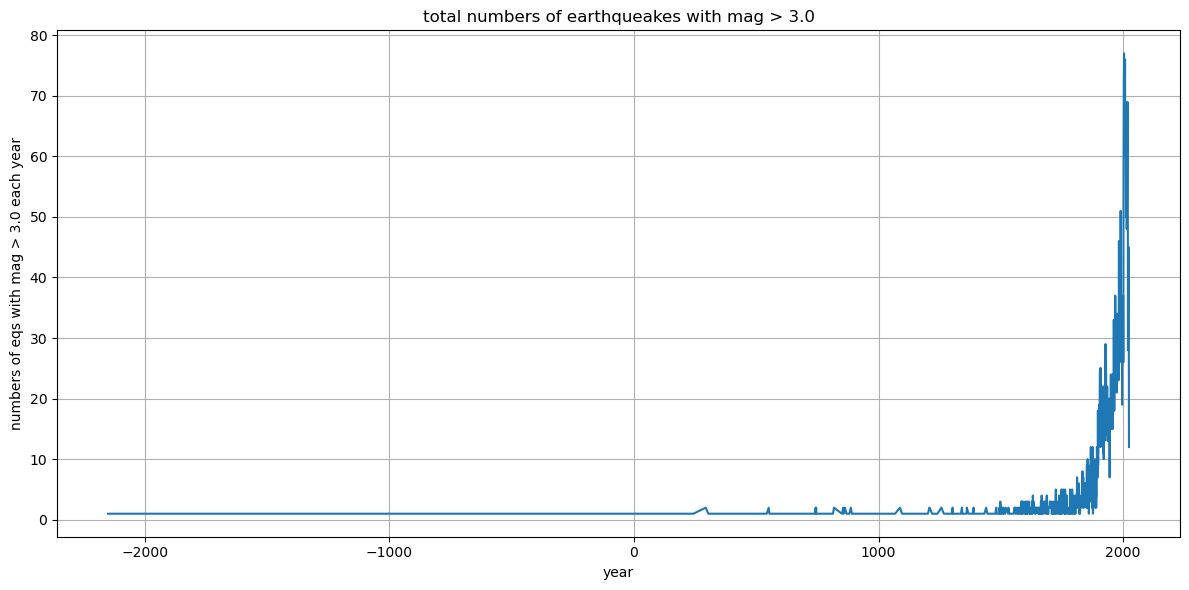

In [13]:
# 1.2 计算全球每年震级大于3.0的地震总数，并绘制时间序列图
import matplotlib.pyplot as plt

# 将 'Mag' 列转换为数字类型，并忽略无效数据
Sig_Eqs['Mag'] = pd.to_numeric(Sig_Eqs['Mag'], errors='coerce')

# 选出震级大于3.0的地震
Sig_Eqs3 = Sig_Eqs[Sig_Eqs['Mag'] > 3.0]

# 按年份分组，并计算每年发生的地震次数
Eqs_per_year = Sig_Eqs3.groupby('Year').size()

# 绘制时间序列图
plt.figure(figsize=(12, 6))
Eqs_per_year.plot(kind='line')
plt.title('total numbers of earthqueakes with mag > 3.0')
plt.xlabel('year')
plt.ylabel('numbers of eqs with mag > 3.0 each year')
plt.grid(True)
plt.tight_layout()
plt.show()

#Q:Do you observe any trend? Explain why or why not?

#A:As time going on ,the number of eqs with mag > 3.0 each year becomes more and more.In my views,there are mainly caused by 3 reasons.

#1.Historical Record Limitations: Earthquake records from the ancient past, especially before the Common Era, are limited and often incomplete.
#2.Advancements in Earthquake Monitoring Technology.
#3.Data Collection and Integration: Modern datasets tend to include more earthquake events, especially smaller magnitude ones. 

In [24]:
# 1.3
# 定义函数 CountEq_LargestEq，计算地震总数
def CountEq_LargestEq(Sig_Eqs, country, start_year=-2150):
    # 筛选出该国家从公元前2150年至今的数据，并排除震级为空的记录
    country_data = Sig_Eqs[(Sig_Eqs['Country'] == country) & 
                           (Sig_Eqs['Year'] >= start_year) & 
                           (Sig_Eqs['Mag'].notna())]

    # 计算地震总数
    total_eqs = country_data.shape[0]
    
    # 找到最大震级及其对应的日期和位置
    if total_eqs > 0:
        # 获取最大震级的整行数据
        largest_eq = country_data.loc[country_data['Mag'].idxmax()]
        largest_mag = largest_eq['Mag']
        largest_date = largest_eq['Year']
        largest_location = largest_eq['Location Name']
    else:
        # 如果没有符合条件的数据
        largest_mag = None
        largest_date = None
        largest_location = None
    
    # 返回地震总数、最大震级、最大震级地震的日期和位置
    return total_eqs, largest_mag, largest_date, largest_location

def report_all_countries(Sig_Eqs, start_year=-2150):

    # 获取所有唯一国家
    countries = Sig_Eqs['Country'].unique()
    
    # 存储每个国家的结果
    results = []
    
    # 遍历每个国家并调用 CountEq_LargestEq 函数计算地震统计信息
    for country in countries:
        total_eqs, largest_mag, largest_date, largest_location = CountEq_LargestEq(Sig_Eqs, country, start_year)
        results.append({
            'Country': country,
            'Total Earthquakes': total_eqs,
            'Largest Magnitude': largest_mag,
            'Largest Date': largest_date,
            'Largest Location': largest_location
        })
    
    # 转换结果为 DataFrame 并按最大震级降序排序
    results_df = pd.DataFrame(results)
    results_df = results_df.sort_values(by='Largest Magnitude', ascending=False).reset_index(drop=True)
    
    return results_df

results_df = report_all_countries(Sig_Eqs, -2150)
print(results_df)


                           Country  Total Earthquakes  Largest Magnitude  \
0                            CHILE                146                9.5   
1                           ALASKA                 70                9.2   
2                            JAPAN                318                9.1   
3                        INDONESIA                321                9.1   
4                           RUSSIA                144                9.0   
..                             ...                ...                ...   
346                     MONTSERRAT                  0                NaN   
347  GUADELOUPE; ANTIGUA; ST KITTS                  0                NaN   
348                  LHOKNGA, ACEH                  0                NaN   
349     NE. HOKKAIDO ISLAND, JAPAN                  0                NaN   
350       NW. HONSHU ISLAND, JAPAN                  0                NaN   

     Largest Date                             Largest Location  
0          1960.0     

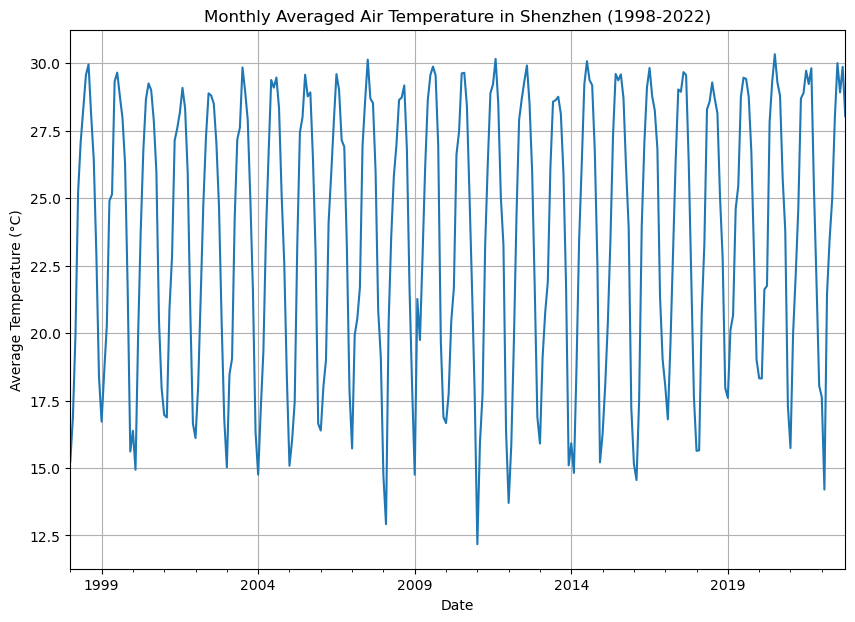

In [34]:
#2
import pandas as pd
import matplotlib.pyplot as plt

# 读取 CSV 文件
data = pd.read_csv('Baoan_Weather_1998_2022.csv', low_memory=False)

# 拆分 TMP 列，将温度和质量控制代码分别存储在新列中
split_columns = data['TMP'].str.split(',')
data['TMP_Value'] = split_columns.str[0]  # 提取温度值部分
data['TMP_Quality'] = split_columns.str[1]  # 提取质量控制代码部分

# 将温度值 (TMP_Value) 转换为数值，并处理缩放因子
data['TMP_Value'] = pd.to_numeric(data['TMP_Value'], errors='coerce') / 10

# 将质量控制代码 (TMP_Quality) 转换为整数
data['TMP_Quality'] = pd.to_numeric(data['TMP_Quality'], errors='coerce')

# 过滤掉无效温度值（例如 NaN 值）和质量控制不合格的数据
data = data.dropna(subset=['TMP_Value'])
data = data[data['TMP_Quality'].isin([0, 1])]

# 将时间数据转换为日期时间格式
data['DATE'] = pd.to_datetime(data['DATE'], errors='coerce')

# 只保留有效日期的数据
data = data.dropna(subset=['DATE'])

# 提取年月并计算每个月的平均温度
data['YearMonth'] = data['DATE'].dt.to_period('M')
monthly_avg_temp = data.groupby('YearMonth')['TMP_Value'].mean()

# 绘制月平均气温随时间的变化图
plt.figure(figsize=(10, 7))
monthly_avg_temp.plot()
plt.title("Monthly Averaged Air Temperature in Shenzhen (1998-2022)")
plt.xlabel("Date")
plt.ylabel("Average Temperature (°C)")
plt.grid(True)
plt.show()



In [7]:
#3.1
import pandas as pd

# 加载数据并指定要解析的列
df = pd.read_csv('ibtracs.ALL.list.v04r00.csv',
                 usecols=range(17),  # 只读取前17列
                 skiprows=[1, 2],  # 跳过文件前两行的解释性内容
                 parse_dates=['ISO_TIME'],  # 将 ISO_TIME 列解析为日期时间格式
                 na_values=['NOT_NAMED', 'NAME'])  # 将无效名称处理为NaN

# 将 'WMO_WIND' 列转换为数值类型，并处理不能转换的数据为 NaN
df['WMO_WIND'] = pd.to_numeric(df['WMO_WIND'], errors='coerce')

# 过滤掉 'WMO_WIND' 列中包含 NaN 的行
df_clean = df.dropna(subset=['WMO_WIND'])

# 3.1 根据风速(WMO_WIND)按风暴(SID)分组，并报告前10个风速最大的飓风的名称

# 按照风暴标识符（SID）分组
max_wind_hurricanes = df_clean.groupby('SID')

# 按照风速列(WMO_WIND)降序排序，并选择风速最大的10个飓风
top_10_hurricanes = df.sort_values(by='WMO_WIND', ascending=False).head(10)

# 打印风速最大的10个飓风的名称和对应的风速
print("风速最大的10个飓风及其风速：")
print(top_10_hurricanes[['NAME', 'WMO_WIND']])


C:\Users\Administrator\AppData\Local\Temp\ipykernel_13372\3136943790.py:5: DtypeWarning: Columns (5) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('ibtracs.ALL.list.v04r00.csv',


风速最大的10个飓风及其风速：
            NAME  WMO_WIND
665954  PATRICIA     185.0
665952  PATRICIA     180.0
665956  PATRICIA     180.0
427636     ALLEN     165.0
178212       NaN     160.0
178210       NaN     160.0
178209       NaN     160.0
552459     LINDA     160.0
605746     WILMA     160.0
482074   GILBERT     160.0


C:\Users\Administrator\AppData\Local\Temp\ipykernel_13372\578332958.py:6: DtypeWarning: Columns (5) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('ibtracs.ALL.list.v04r00.csv',
C:\Users\Administrator\AppData\Local\Temp\ipykernel_13372\578332958.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['NAME'] = df_clean['NAME'].fillna('Unnamed')


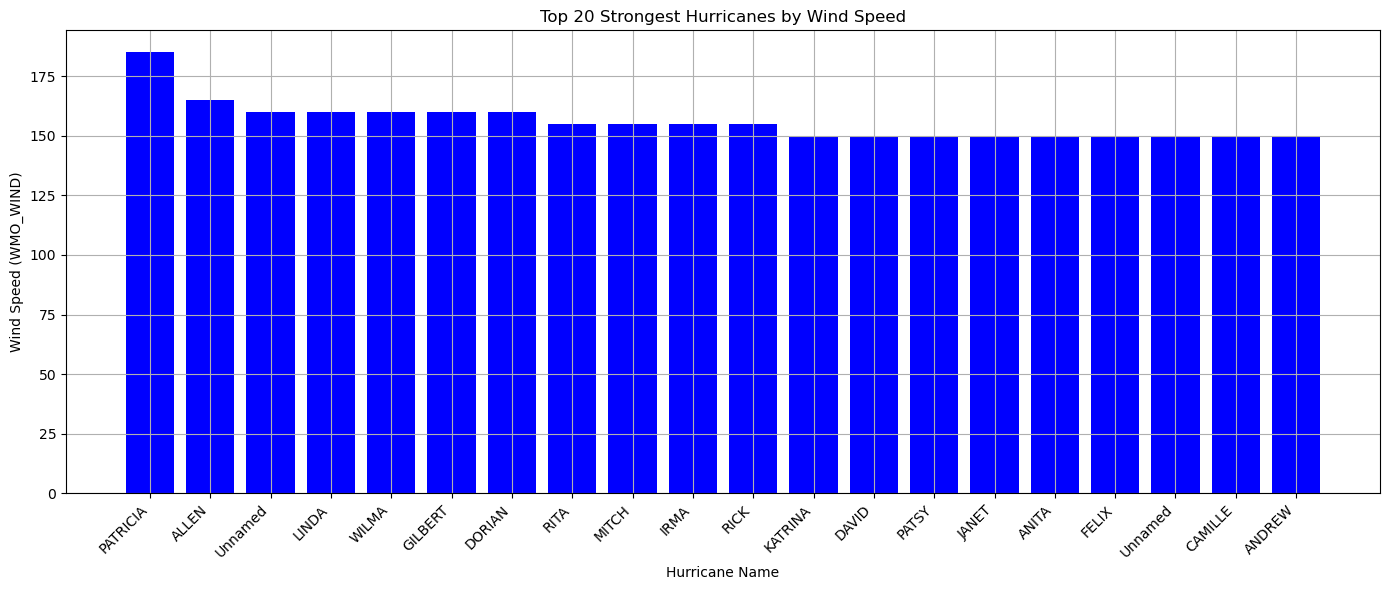

                  SID      NAME  WMO_WIND
665954  2015293N13266  PATRICIA     185.0
427636  1980214N11330     ALLEN     165.0
178212  1935241N23291   Unnamed     160.0
552459  1997253N12255     LINDA     160.0
605746  2005289N18282     WILMA     160.0
482074  1988253N12306   GILBERT     160.0
689332  2019236N10314    DORIAN     160.0
604982  2005261N21290      RITA     155.0
560437  1998295N12284     MITCH     155.0
676151  2017242N16333      IRMA     155.0
629196  2009288N07267      RICK     155.0
603786  2005236N23285   KATRINA     150.0
421499  1979238N12324     DAVID     150.0
279355  1959249N19181     PATSY     150.0
258263  1955265N13307     JANET     150.0
407131  1977242N27272     ANITA     150.0
615985  2007244N12303     FELIX     150.0
167919  1932304N15305   Unnamed     150.0
345912  1969226N18280   CAMILLE     150.0
510474  1992230N11325    ANDREW     150.0


In [26]:
#3.2
import pandas as pd
import matplotlib.pyplot as plt

# 加载数据并指定要解析的列
df = pd.read_csv('ibtracs.ALL.list.v04r00.csv',
                 usecols=range(17),  # 只读取前17列
                 skiprows=[1, 2],  # 跳过文件前两行的解释性内容
                 parse_dates=['ISO_TIME'],  # 将 ISO_TIME 列解析为日期时间格式
                 na_values=['NOT_NAMED', 'NAME'])  # 将无效名称处理为NaN

# 将 'WMO_WIND' 列转换为数值类型，并处理不能转换的数据为 NaN
df['WMO_WIND'] = pd.to_numeric(df['WMO_WIND'], errors='coerce')

# 过滤掉 'WMO_WIND' 列中包含 NaN 的行
df_clean = df.dropna(subset=['WMO_WIND'])

# 将 'NAME' 列中的 NaN 值替换为 'Unnamed'
df_clean['NAME'] = df_clean['NAME'].fillna('Unnamed')

# 按照风速降序排序，选择风速最大的20个飓风，同时去掉重复风速数据
top_20_hurricanes = df_clean.sort_values(by='WMO_WIND', ascending=False).drop_duplicates('SID').head(20)

# 确保 'NAME' 列为字符串类型
top_20_hurricanes['NAME'] = top_20_hurricanes['NAME'].astype(str)

# 使用 SID 绘制柱状图
plt.figure(figsize=(14, 6))
plt.bar(top_20_hurricanes['SID'], top_20_hurricanes['WMO_WIND'], color='blue')

# 设置 x 轴的刻度标签为对应的 NAME
plt.xticks(ticks=top_20_hurricanes['SID'], labels=top_20_hurricanes['NAME'], rotation=45, ha='right')

# 图表标题和标签
plt.title('Top 20 Strongest Hurricanes by Wind Speed')
plt.xlabel('Hurricane Name')
plt.ylabel('Wind Speed (WMO_WIND)')
plt.grid(True)
plt.tight_layout()  # 调整布局防止标签重叠
plt.show()

print(top_20_hurricanes[['SID', 'NAME', 'WMO_WIND']])



C:\Users\Administrator\AppData\Local\Temp\ipykernel_15332\443887139.py:6: DtypeWarning: Columns (5) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('ibtracs.ALL.list.v04r00.csv',


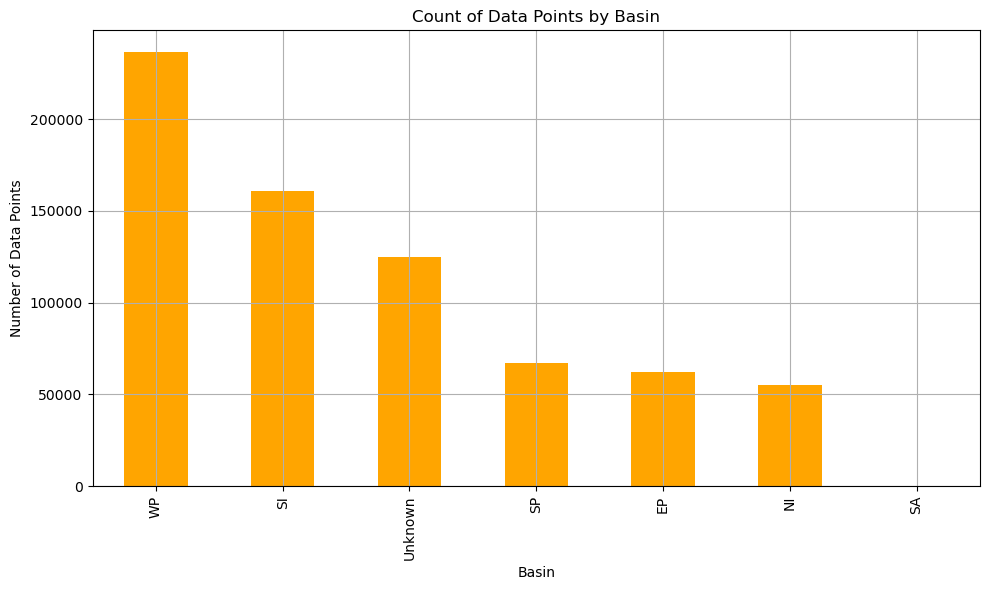

In [19]:
#3.3
import pandas as pd
import matplotlib.pyplot as plt

# 加载数据并指定要解析的列
df = pd.read_csv('ibtracs.ALL.list.v04r00.csv',
                 usecols=range(17),  # 只读取前17列
                 skiprows=[1, 2],  # 跳过文件前两行的解释性内容
                 parse_dates=['ISO_TIME'],  # 将 ISO_TIME 列解析为日期时间格式
                 na_values=['NOT_NAMED', 'NAME'])  # 将无效名称处理为NaN

# 检查 'BASIN' 列是否有缺失值，如果有则处理
df['BASIN'] = df['BASIN'].fillna('Unknown')  # 将 NaN 替换为 'Unknown'

# 统计每个流域的数据点数量
basin_counts = df['BASIN'].value_counts()

# 绘制柱状图
plt.figure(figsize=(10, 6))
basin_counts.plot(kind='bar', color='orange')
plt.title('Count of Data Points by Basin')
plt.xlabel('Basin')
plt.ylabel('Number of Data Points')
plt.grid(True)
plt.tight_layout()  # 调整布局防止标签重叠
plt.show()



C:\Users\Administrator\AppData\Local\Temp\ipykernel_15332\1022307861.py:6: DtypeWarning: Columns (5) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('ibtracs.ALL.list.v04r00.csv',


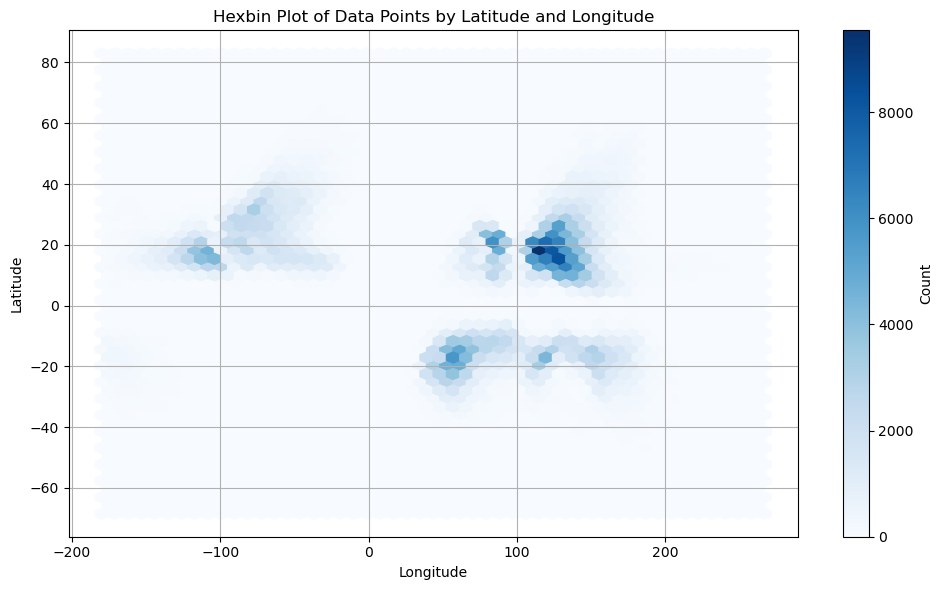

In [20]:
#3.4
import pandas as pd
import matplotlib.pyplot as plt

# 加载数据并指定要解析的列
df = pd.read_csv('ibtracs.ALL.list.v04r00.csv',
                 usecols=range(17),  # 只读取前17列
                 skiprows=[1, 2],  # 跳过文件前两行的解释性内容
                 parse_dates=['ISO_TIME'],  # 将 ISO_TIME 列解析为日期时间格式
                 na_values=['NOT_NAMED', 'NAME'])  # 将无效名称处理为NaN

# 处理 LAT 和 LON 中的缺失值
df_clean = df.dropna(subset=['LAT', 'LON'])

# 绘制六边形图，显示纬度和经度的分布情况
plt.figure(figsize=(10, 6))
plt.hexbin(df_clean['LON'], df_clean['LAT'], gridsize=50, cmap='Blues')  # 绘制六边形图
plt.colorbar(label='Count')  # 显示颜色条表示数据点数量
plt.title('Hexbin Plot of Data Points by Latitude and Longitude')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.grid(True)
plt.tight_layout()  # 调整布局以防止标签重叠
plt.show()


C:\Users\Administrator\AppData\Local\Temp\ipykernel_15332\3947118412.py:6: DtypeWarning: Columns (5) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('ibtracs.ALL.list.v04r00.csv',


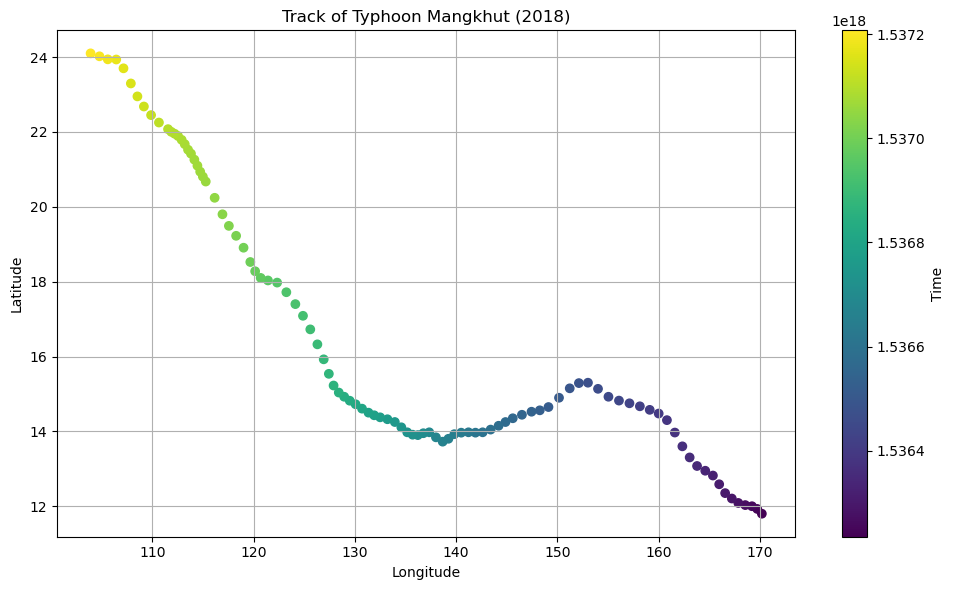

In [21]:
#3.5
import pandas as pd
import matplotlib.pyplot as plt

# 加载数据并指定要解析的列
df = pd.read_csv('ibtracs.ALL.list.v04r00.csv',
                 usecols=range(17),  # 只读取前17列
                 skiprows=[1, 2],  # 跳过文件前两行的解释性内容
                 parse_dates=['ISO_TIME'],  # 将 ISO_TIME 列解析为日期时间格式
                 na_values=['NOT_NAMED', 'NAME'])  # 将无效名称处理为NaN

# 处理 LAT, LON 和 NAME 中的缺失值
df_clean = df.dropna(subset=['LAT', 'LON', 'NAME'])

# 筛选出台风山竹（MANGKHUT）在 2018 年的数据
typhoon_Mangkhut = df_clean[(df_clean['NAME'] == 'MANGKHUT') & (df_clean['ISO_TIME'].dt.year == 2018)]

# 绘制台风山竹的路径图（经纬度散点图）
plt.figure(figsize=(10, 6))
plt.scatter(typhoon_Mangkhut['LON'], typhoon_Mangkhut['LAT'], c=typhoon_Mangkhut['ISO_TIME'], cmap='viridis', label='Mangkhut Track')
plt.colorbar(label='Time')  # 显示时间的颜色条
plt.title('Track of Typhoon Mangkhut (2018)')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.grid(True)
plt.tight_layout()  # 调整布局防止标签重叠
plt.show()


In [22]:
#3.6
import pandas as pd

# 加载数据并指定要解析的列
df = pd.read_csv('ibtracs.ALL.list.v04r00.csv',
                 usecols=range(17),  # 只读取前17列
                 skiprows=[1, 2],  # 跳过文件前两行的解释性内容
                 parse_dates=['ISO_TIME'],  # 将 ISO_TIME 列解析为日期时间格式
                 na_values=['NOT_NAMED', 'NAME'])  # 将无效名称处理为NaN

# 筛选1970年之后的数据，并且流域为 WP 或 EP
filtered_df = df[(df['ISO_TIME'].dt.year >= 1970) & (df['BASIN'].isin(['WP', 'EP']))]

# 查看过滤后的数据框
print(filtered_df.head())


C:\Users\Administrator\AppData\Local\Temp\ipykernel_15332\1326338965.py:5: DtypeWarning: Columns (5) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('ibtracs.ALL.list.v04r00.csv',


                  SID  SEASON  NUMBER BASIN SUBBASIN   NAME  \
350393  1970050N07151    1970      22    WP       MM  NANCY   
350394  1970050N07151    1970      22    WP       MM  NANCY   
350395  1970050N07151    1970      22    WP       MM  NANCY   
350396  1970050N07151    1970      22    WP       MM  NANCY   
350397  1970050N07151    1970      22    WP       MM  NANCY   

                  ISO_TIME NATURE      LAT      LON WMO_WIND WMO_PRES  \
350393 1970-02-19 00:00:00     TS  7.00000  151.400              1006   
350394 1970-02-19 03:00:00     TS  7.24752  151.205                     
350395 1970-02-19 06:00:00     TS  7.50000  151.000              1002   
350396 1970-02-19 09:00:00     TS  7.75747  150.772                     
350397 1970-02-19 12:00:00     TS  8.00000  150.500               998   

       WMO_AGENCY TRACK_TYPE  DIST2LAND LANDFALL           IFLAG  
350393      tokyo       main       1088     1088  _OO___________  
350394                  main       1109     1109

C:\Users\Administrator\AppData\Local\Temp\ipykernel_12232\4293210067.py:6: DtypeWarning: Columns (5) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('ibtracs.ALL.list.v04r00.csv',


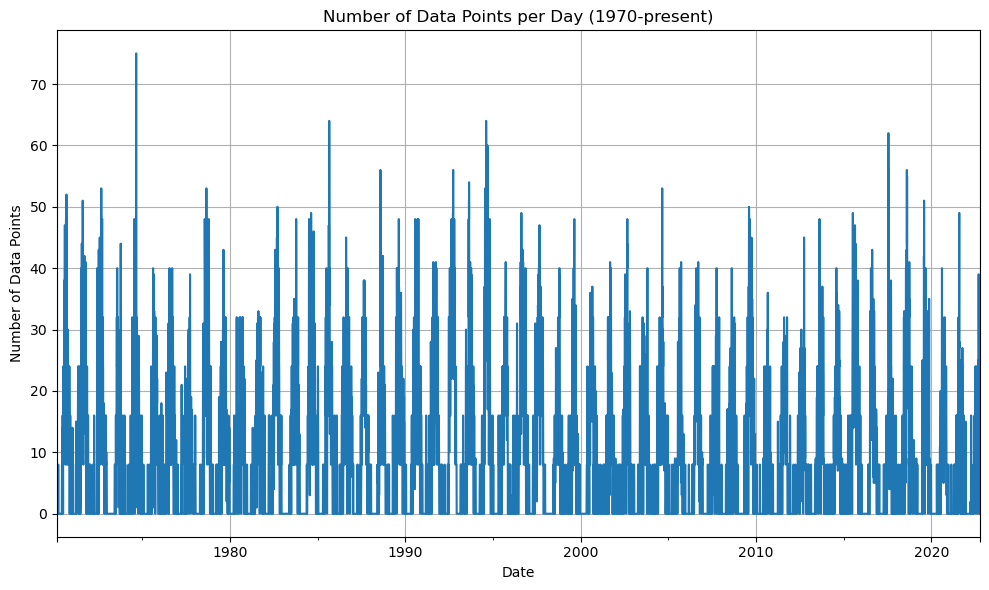

In [4]:
#3.7
import pandas as pd
import matplotlib.pyplot as plt

# 加载数据并指定要解析的列
df = pd.read_csv('ibtracs.ALL.list.v04r00.csv',
                 usecols=range(17),  # 只读取前17列
                 skiprows=[1, 2],  # 跳过文件前两行的解释性内容
                 parse_dates=['ISO_TIME'],  # 将 ISO_TIME 列解析为日期时间格式
                 na_values=['NOT_NAMED', 'NAME'])  # 将无效名称处理为NaN

# 筛选1970年之后的数据，并且流域为 WP 或 EP
filtered_df = df[(df['ISO_TIME'].dt.year >= 1970) & (df['BASIN'].isin(['WP', 'EP']))]

# 计算每一天的数据点数量
daily_counts = filtered_df.resample('D', on='ISO_TIME').size()

# 绘制时间序列图
plt.figure(figsize=(10, 6))
daily_counts.plot()
plt.title('Number of Data Points per Day (1970-present)')
plt.xlabel('Date')
plt.ylabel('Number of Data Points')
plt.grid(True)
plt.tight_layout()  # 调整布局防止标签重叠
plt.show()


C:\Users\Administrator\AppData\Local\Temp\ipykernel_12232\2304643958.py:6: DtypeWarning: Columns (5) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('ibtracs.ALL.list.v04r00.csv',
C:\Users\Administrator\AppData\Local\Temp\ipykernel_12232\2304643958.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['DAY_OF_YEAR'] = filtered_df['ISO_TIME'].dt.dayofyear


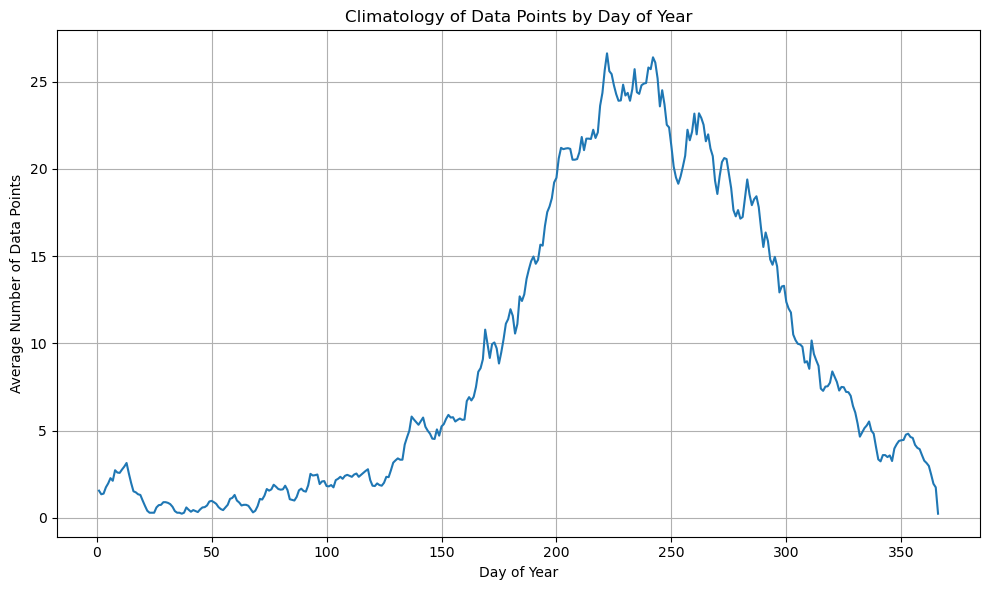

In [5]:
#3.8
import pandas as pd
import matplotlib.pyplot as plt

# 加载数据并指定要解析的列
df = pd.read_csv('ibtracs.ALL.list.v04r00.csv',
                 usecols=range(17),  # 只读取前17列
                 skiprows=[1, 2],  # 跳过文件前两行的解释性内容
                 parse_dates=['ISO_TIME'],  # 将 ISO_TIME 列解析为日期时间格式
                 na_values=['NOT_NAMED', 'NAME'])  # 将无效名称处理为NaN

# 筛选1970年之后的数据，并且流域为 WP 或 EP
filtered_df = df[(df['ISO_TIME'].dt.year >= 1970) & (df['BASIN'].isin(['WP', 'EP']))]

# 添加一年中的天数（day of year）
filtered_df['DAY_OF_YEAR'] = filtered_df['ISO_TIME'].dt.dayofyear

# 按每年中的天数分组，计算每一天的平均数据点数量（气候学）
climatology = filtered_df.groupby('DAY_OF_YEAR').size() / len(filtered_df['ISO_TIME'].dt.year.unique())

# 绘制气候学图表
plt.figure(figsize=(10, 6))
climatology.plot()
plt.title('Climatology of Data Points by Day of Year')
plt.xlabel('Day of Year')
plt.ylabel('Average Number of Data Points')
plt.grid(True)
plt.tight_layout()  # 调整布局防止标签重叠
plt.show()


C:\Users\Administrator\AppData\Local\Temp\ipykernel_12232\1810207189.py:6: DtypeWarning: Columns (5) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('ibtracs.ALL.list.v04r00.csv',
C:\Users\Administrator\AppData\Local\Temp\ipykernel_12232\1810207189.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['DAY_OF_YEAR'] = filtered_df['ISO_TIME'].dt.dayofyear


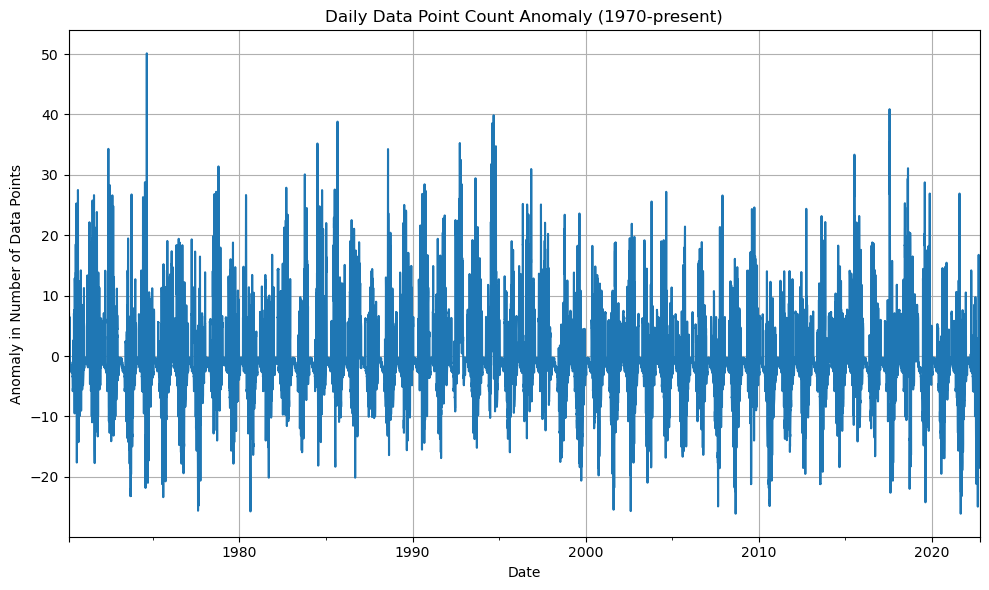

In [6]:
#3.9
import pandas as pd
import matplotlib.pyplot as plt

# 加载数据并指定要解析的列
df = pd.read_csv('ibtracs.ALL.list.v04r00.csv',
                 usecols=range(17),  # 只读取前17列
                 skiprows=[1, 2],  # 跳过文件前两行的解释性内容
                 parse_dates=['ISO_TIME'],  # 将 ISO_TIME 列解析为日期时间格式
                 na_values=['NOT_NAMED', 'NAME'])  # 将无效名称处理为NaN

# 筛选1970年之后的数据，并且流域为 WP 或 EP
filtered_df = df[(df['ISO_TIME'].dt.year >= 1970) & (df['BASIN'].isin(['WP', 'EP']))]

# 添加一年中的天数（day of year）
filtered_df['DAY_OF_YEAR'] = filtered_df['ISO_TIME'].dt.dayofyear

# 计算每一天的气候学（按 dayofyear）
climatology = filtered_df.groupby('DAY_OF_YEAR').size() / len(filtered_df['ISO_TIME'].dt.year.unique())

# 计算每一天的实际数据点数量
daily_counts = filtered_df.resample('D', on='ISO_TIME').size()

# 映射每天的 dayofyear 到 climatology 中，确保长度匹配
day_of_year_series = daily_counts.index.dayofyear
climatology_mapped = day_of_year_series.map(climatology)

# 计算异常值：每天的数据点数量减去气候学值
daily_anomaly = daily_counts - climatology_mapped.values

# 绘制异常值图表
plt.figure(figsize=(10, 6))
daily_anomaly.plot()
plt.title('Daily Data Point Count Anomaly (1970-present)')
plt.xlabel('Date')
plt.ylabel('Anomaly in Number of Data Points')
plt.grid(True)
plt.tight_layout()  # 调整布局防止标签重叠
plt.show()


C:\Users\Administrator\AppData\Local\Temp\ipykernel_15332\395633193.py:6: DtypeWarning: Columns (5) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('ibtracs.ALL.list.v04r00.csv',
C:\Users\Administrator\AppData\Local\Temp\ipykernel_15332\395633193.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['DAY_OF_YEAR'] = filtered_df['ISO_TIME'].dt.dayofyear
C:\Users\Administrator\AppData\Local\Temp\ipykernel_15332\395633193.py:32: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  annual_anomaly = daily_anomaly.resample('Y').sum()


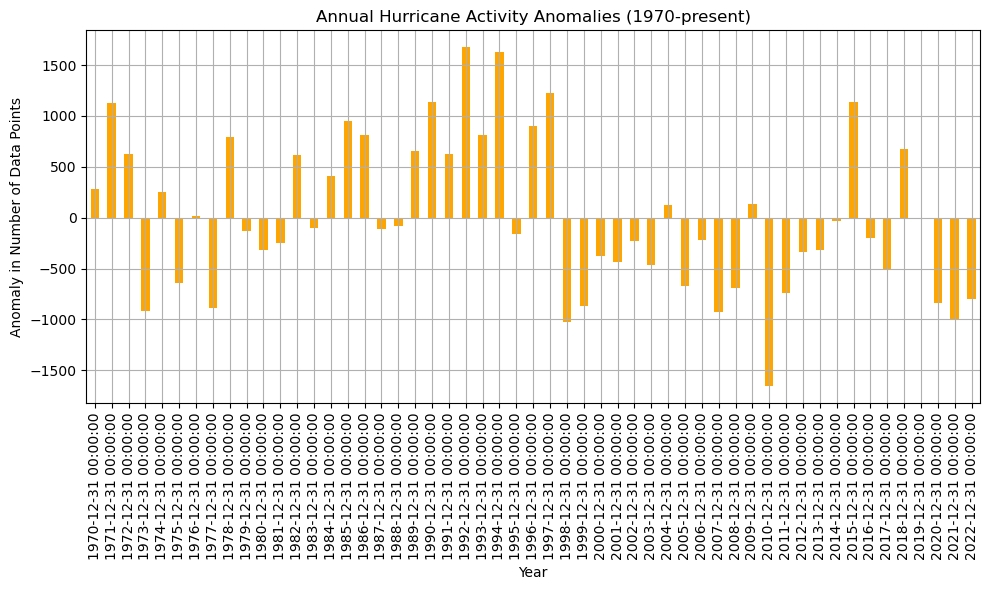

Years with most anomalous hurricane activity:
ISO_TIME
1992-12-31    1674.603774
1994-12-31    1624.849057
1997-12-31    1228.849057
1990-12-31    1134.849057
2015-12-31    1132.849057
dtype: float64


In [30]:
#3.10
import pandas as pd
import matplotlib.pyplot as plt

# 加载数据并指定要解析的列
df = pd.read_csv('ibtracs.ALL.list.v04r00.csv',
                 usecols=range(17),  # 只读取前17列
                 skiprows=[1, 2],  # 跳过文件前两行的解释性内容
                 parse_dates=['ISO_TIME'],  # 将 ISO_TIME 列解析为日期时间格式
                 na_values=['NOT_NAMED', 'NAME'])  # 将无效名称处理为NaN

# 筛选1970年之后的数据，并且流域为 WP 或 EP
filtered_df = df[(df['ISO_TIME'].dt.year >= 1970) & (df['BASIN'].isin(['WP', 'EP']))]

# 添加一年中的天数（day of year）
filtered_df['DAY_OF_YEAR'] = filtered_df['ISO_TIME'].dt.dayofyear

# 计算每一天的气候学（按 dayofyear）
climatology = filtered_df.groupby('DAY_OF_YEAR').size() / len(filtered_df['ISO_TIME'].dt.year.unique())

# 计算每一天的实际数据点数量
daily_counts = filtered_df.resample('D', on='ISO_TIME').size()

# 映射每天的 dayofyear 到 climatology 中，确保长度匹配
day_of_year_series = daily_counts.index.dayofyear
climatology_mapped = day_of_year_series.map(climatology)

# 计算异常值：每天的数据点数量减去气候学值
daily_anomaly = daily_counts - climatology_mapped.values

#  按年重新采样异常值
annual_anomaly = daily_anomaly.resample('Y').sum()

# 绘制年度异常值时间序列
plt.figure(figsize=(10, 6))
annual_anomaly.plot(kind='bar', color='orange')
plt.title('Annual Hurricane Activity Anomalies (1970-present)')
plt.xlabel('Year')
plt.ylabel('Anomaly in Number of Data Points')
plt.grid(True)
plt.tight_layout()  # 调整布局防止标签重叠
plt.show()

# 打印出异常值最大的前几个年份
print("Years with most anomalous hurricane activity:")
print(annual_anomaly.nlargest(5))


In [36]:
#4.1
import pandas as pd

# 加载CSV文件  # 使用正确的文件路径
df = pd.read_csv('USC00218450.csv')

# 将 'DATE' 列转换为日期格式，确保时间数据有效
df['DATE'] = pd.to_datetime(df['DATE'], errors='coerce')

# 删除在关键列 'DATE', 'TAVG', 'TMAX', 'TMIN' 中存在缺失值的数据行
df_clean = df.dropna(subset=['DATE', 'TAVG', 'TMAX', 'TMIN'])

# 显示清理后的数据概况
df_clean.info()

# 显示清理后的前几行数据
df_clean.head()




<class 'pandas.core.frame.DataFrame'>
Index: 60 entries, 2 to 61
Columns: 180 entries, STATION to TMIN_ATTRIBUTES
dtypes: datetime64[ns](1), float64(94), object(85)
memory usage: 84.8+ KB


,STATION,DATE,LATITUDE,LONGITUDE,ELEVATION,NAME,CDSD,CDSD_ATTRIBUTES,CLDD,CLDD_ATTRIBUTES,...,PRCP,PRCP_ATTRIBUTES,SNOW,SNOW_ATTRIBUTES,TAVG,TAVG_ATTRIBUTES,TMAX,TMAX_ATTRIBUTES,TMIN,TMIN_ATTRIBUTES
2,USC00218450,1970-01-01 00:00:00.000001963,44.9902,-93.17995,295.7,"UNIVERSITY OF MN ST. PAUL, MN US",395.5,NaN,395.5,Z,...,531.7,",Z",NaN,NaN,7.49,Z,12.83,Z,2.16,Z
3,USC00218450,1970-01-01 00:00:00.000001964,44.9902,-93.17995,295.7,"UNIVERSITY OF MN ST. PAUL, MN US",461.7,NaN,461.7,Z,...,685.1,",Z",NaN,NaN,8.08,Z,13.85,Z,2.30,Z
4,USC00218450,1970-01-01 00:00:00.000001965,44.9902,-93.17995,295.7,"UNIVERSITY OF MN ST. PAUL, MN US",250.5,NaN,250.5,Z,...,988.7,",Z",NaN,NaN,6.25,Z,11.34,Z,1.16,Z
5,USC00218450,1970-01-01 00:00:00.000001966,44.9902,-93.17995,295.7,"UNIVERSITY OF MN ST. PAUL, MN US",375.1,NaN,375.1,Z,...,616.7,",Z",NaN,NaN,6.51,Z,11.93,Z,1.09,Z
6,USC00218450,1970-01-01 00:00:00.000001967,44.9902,-93.17995,295.7,"UNIVERSITY OF MN ST. PAUL, MN US",250.9,NaN,250.9,Z,...,610.7,",Z",NaN,NaN,6.54,Z,11.99,Z,1.09,Z


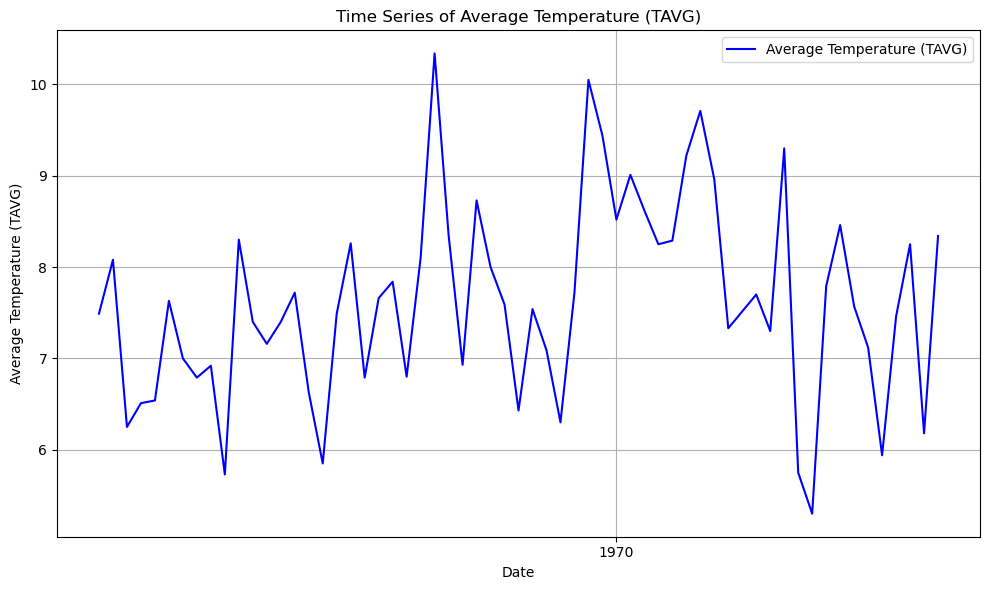

In [37]:
#4.2
import matplotlib.pyplot as plt

# 绘制平均气温（TAVG）的时间序列
plt.figure(figsize=(10, 6))
plt.plot(df_clean['DATE'], df_clean['TAVG'], label='Average Temperature (TAVG)', color='blue')
plt.title('Time Series of Average Temperature (TAVG)')
plt.xlabel('Date')
plt.ylabel('Average Temperature (TAVG)')
plt.grid(True)
plt.legend()
plt.tight_layout()

# 显示图表
plt.show()


In [38]:
# 4.3 对 TAVG 变量进行至少5项简单统计检查，并报告结果

# 1. 计算 TAVG 的均值
mean_tavg = df_clean['TAVG'].mean()

# 2. 计算 TAVG 的中位数
median_tavg = df_clean['TAVG'].median()

# 3. 计算 TAVG 的标准差
std_tavg = df_clean['TAVG'].std()

# 4. 计算 TAVG 的最小值
min_tavg = df_clean['TAVG'].min()

# 5. 计算 TAVG 的最大值
max_tavg = df_clean['TAVG'].max()

# 打印统计结果
print(f"Mean (TAVG): {mean_tavg}")
print(f"Median (TAVG): {median_tavg}")
print(f"Standard Deviation (TAVG): {std_tavg}")
print(f"Minimum (TAVG): {min_tavg}")
print(f"Maximum (TAVG): {max_tavg}")


Mean (TAVG): 7.620333333333333
Median (TAVG): 7.58
Standard Deviation (TAVG): 1.0976816349704557
Minimum (TAVG): 5.3
Maximum (TAVG): 10.34


In [7]:
import json
from nbformat import read, write

def extract_comments_from_cell(cell):
    comments = []
    for line in cell.source.split('\n'):
        if line.strip().startswith('#'):
            comments.append(line)
    return comments

def extract_comments_from_notebook(notebook_path):
    with open(notebook_path, 'r', encoding='utf-8') as f:
        nb = read(f, as_version=4)
    comments = []
    for cell in nb.cells:
        if cell.cell_type == 'code':
            comments.extend(extract_comments_from_cell(cell))
    return comments

# 替换为你的Jupyter Notebook文件路径
notebook_path = 'PS2.ipynb'
comments = extract_comments_from_notebook(notebook_path)

# 将批注保存到文本文件
with open('comments.txt', 'w', encoding='utf-8') as f:
    for comment in comments:
        f.write(comment + '\n')

# 打印批注
comments

['#1.1',
 '# 读取TSV格式的地震数据文件',
 '# 1.1 计算每个国家的总死亡人数，并输出死亡人数最多的前20个国家',
 '# 忽略无效数据',
 '# 提取location name中"："前的国家名',
 '# 按国家分组，计算每个国家的总死亡人数',
 '# 按死亡人数降序排列，并选择前20个国家',
 '# 输出前20个国家的结果',
 '# 计算所有国家的总死亡人数',
 '# 输出全球因地震导致的总死亡人数',
 '# 1.2 计算全球每年震级大于3.0的地震总数，并绘制时间序列图',
 "# 将 'Mag' 列转换为数字类型，并忽略无效数据",
 '# 选出震级大于3.0的地震',
 '# 按年份分组，并计算每年发生的地震次数',
 '# 绘制时间序列图',
 '#Q:Do you observe any trend? Explain why or why not?',
 '#A:As time going on ,the number of eqs with mag > 3.0 each year becomes more and more.In my views,there are mainly caused by 3 reasons.',
 '#1.Historical Record Limitations: Earthquake records from the ancient past, especially before the Common Era, are limited and often incomplete.',
 '#2.Advancements in Earthquake Monitoring Technology.',
 '#3.Data Collection and Integration: Modern datasets tend to include more earthquake events, especially smaller magnitude ones. ',
 '# 1.3',
 '# 定义函数 CountEq_LargestEq，计算地震总数',
 '    # 筛选出该国家从公元前2150年至今的数据，并排除震级为空的记录',
 '    # 计算地震总数',
 '    # 找到